# Scrapping Suicide Reviews from Twitter

In [ ]:
pip install snscrape

In [ ]:
import snscrape.base
import snscrape.modules.twitter as sntwitter
import pandas as pd
import itertools

In [ ]:
# our search term, using syntax for Twitter's Advanced Search
search = '#suicide since:2015-01-01 until:2021-09-26 lang:en' # -filter:nativeretweets'

# the scraped tweets, this is a generator
scraped_tweets = sntwitter.TwitterSearchScraper(search).get_items()

# slicing the generator to keep only the first 10000 tweets
sliced_scraped_tweets = itertools.islice(scraped_tweets, 10000)

# convert to a DataFrame and keep only relevant columns
df = pd.DataFrame(sliced_scraped_tweets)[['date','content']]

In [ ]:
df.shape

(10000, 2)

In [ ]:
df.head()

,date,content
0,2021-09-25 23:52:47+00:00,Really frustrates me when people keep banging ...
1,2021-09-25 23:51:44+00:00,"What is ""chronically suicidal""? What's the cut..."
2,2021-09-25 23:25:11+00:00,another appalling case of neglect resulting in...
3,2021-09-25 23:17:26+00:00,More impactful work from @HeatherSchatten and ...
4,2021-09-25 23:04:01+00:00,St. Luke’s campuses are illuminated purple for...


In [ ]:
df.iloc[91,1]

'Preliminary reports said that Dutta died by suicide. Bidyut has been an employee of Pallavi Motors for many years and has served as the team leader.\n\nhttps://t.co/bDt1Ng9CQu\n\n#guwahati #pallavimotors #employee #suicide #office'

In [ ]:
df.iloc[3,1]

'More impactful work from @HeatherSchatten and @MichaelArmeyPhD \n\nEvaluating Potential Iatrogenic Effects of a #Suicide Focused Research Protocol | Crisis https://t.co/6E7JBNNVQb'

In [ ]:
df.iloc[30,1]

'One presentation showed 13% of U.K. #teen users and 6% of U.S. teen users who reported thoughts of #suicide traced them to #Instagram. March 2020 internal #Facebook research said the tendency to share only the best moments, pressure to look perfect.3/4'

# Text Processing

In [ ]:
import pandas as pd
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
train_tweets = df.copy()
train_tweets.head()

,date,content
0,2021-09-25 23:52:47+00:00,Really frustrates me when people keep banging ...
1,2021-09-25 23:51:44+00:00,"What is ""chronically suicidal""? What's the cut..."
2,2021-09-25 23:25:11+00:00,another appalling case of neglect resulting in...
3,2021-09-25 23:17:26+00:00,More impactful work from @HeatherSchatten and ...
4,2021-09-25 23:04:01+00:00,St. Luke’s campuses are illuminated purple for...


In [ ]:
import nltk
nltk.download('all')

In [ ]:
# Removing URLs
def remove_URL(headline_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', headline_text)

In [ ]:
df1=train_tweets.copy()
df1['content']=df1['content'].apply(remove_URL)

In [ ]:
# Removing the html tags
def remove_html(headline_text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',headline_text)

In [ ]:
df1['content']=df1['content'].apply(remove_html)
df1.content.values

array(['Really frustrates me when people keep banging the drum of “open up and talk to someone”-sometimes it’s not THAT easy. Sometimes os impossible to open up, sometimes that’s half the problem. But why ruin the mantra?!\n#anxiety #depression #suicide',
       'What is "chronically suicidal"? What\'s the cut off? What\'s the beginning? What stops one from being "chronically suicidal"? \n#SuicidePrevention \n#SuicidePreventionMonth \n#SuicideAwareness \n#suicide',
       'another appalling case of neglect resulting in #suicide ', ...,
       'Suicide Attack in Iraq Sadr City kills at least 35, wounds dozens: Sources \n\n#Iraq #suicide #attacks #Latestnews ',
       'When @GovLarryHogan and @Marc_Elrich face #murdercharge for causing a rise in #suicide due to their #lockdown #orders then we can talk about the #governors #demand #taxpayers pay for this: ',
       'As someone with a lived experience, I concur! :  "..it can be akin to having a decade of #therapy in a month". #psychedelics

In [ ]:
# Removing Pictures/Tags/Symbols/Emojis
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
df1['content']=df1['content'].apply(remove_emojis)
df1.content.values

array(['Really frustrates me when people keep banging the drum of “open up and talk to someone”-sometimes it’s not THAT easy. Sometimes os impossible to open up, sometimes that’s half the problem. But why ruin the mantra?!\n#anxiety #depression #suicide',
       'What is "chronically suicidal"? What\'s the cut off? What\'s the beginning? What stops one from being "chronically suicidal"? \n#SuicidePrevention \n#SuicidePreventionMonth \n#SuicideAwareness \n#suicide',
       'another appalling case of neglect resulting in #suicide ', ...,
       'Suicide Attack in Iraq Sadr City kills at least 35, wounds dozens: Sources \n\n#Iraq #suicide #attacks #Latestnews ',
       'When @GovLarryHogan and @Marc_Elrich face #murdercharge for causing a rise in #suicide due to their #lockdown #orders then we can talk about the #governors #demand #taxpayers pay for this: ',
       'As someone with a lived experience, I concur! :  "..it can be akin to having a decade of #therapy in a month". #psychedelics

In [ ]:
import string

# Removing punctuations
def remove_punct(headline_text):
    table=str.maketrans('','',string.punctuation)
    return headline_text.translate(table)

In [ ]:
df1['content']=df1['content'].apply(remove_punct)
df1.content.values

array(['Really frustrates me when people keep banging the drum of “open up and talk to someone”sometimes it’s not THAT easy Sometimes os impossible to open up sometimes that’s half the problem But why ruin the mantra\nanxiety depression suicide',
       'What is chronically suicidal Whats the cut off Whats the beginning What stops one from being chronically suicidal \nSuicidePrevention \nSuicidePreventionMonth \nSuicideAwareness \nsuicide',
       'another appalling case of neglect resulting in suicide ', ...,
       'Suicide Attack in Iraq Sadr City kills at least 35 wounds dozens Sources \n\nIraq suicide attacks Latestnews ',
       'When GovLarryHogan and MarcElrich face murdercharge for causing a rise in suicide due to their lockdown orders then we can talk about the governors demand taxpayers pay for this ',
       'As someone with a lived experience I concur   it can be akin to having a decade of therapy in a month psychedelics MDMA mentalhealth suicide depression anxiety PTSD tr

In [ ]:
df1.drop(columns=['date'],inplace=True)
refined_data=df1.copy()
refined_data.head()

,content
0,Really frustrates me when people keep banging ...
1,What is chronically suicidal Whats the cut off...
2,another appalling case of neglect resulting in...
3,More impactful work from HeatherSchatten and M...
4,St Luke’s campuses are illuminated purple for ...


# Aspect Based Sentiment Analysis

In [ ]:
import os
#!pip install spacy
import spacy
from tqdm import tqdm
import en_core_web_sm
nlp = en_core_web_sm.load()
toy_rev=df1.copy()

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
def aspect_based_analysis(toy_rev):
    # toy_rev ---> The final_dataset on which we perform sentiment analysis
    nlp = en_core_web_sm.load()
    competitors = ['Depression','Stress','Relationship','Emotions','Finance','Society']
    aspect_terms = []
    comp_terms = []
    easpect_terms = []
    ecomp_terms = []
    enemy = []
    for x in tqdm(range(len(toy_rev['content']))):
        amod_pairs = []
        advmod_pairs = []
        compound_pairs = []
        xcomp_pairs = []
        neg_pairs = []
        eamod_pairs = []
        eadvmod_pairs = []
        ecompound_pairs = []
        eneg_pairs = []
        excomp_pairs = []
        enemlist = []
        if len(str(toy_rev['content'][x])) != 0:
            lines = str(toy_rev['content'][x]).replace('*',' ').replace('-',' ').replace('so ',' ').replace('be ',' ').replace('are ',' ').replace('just ',' ').replace('get ','').replace('were ',' ').replace('When ','').replace('when ','').replace('again ',' ').replace('where ','').replace('how ',' ').replace('has ',' ').replace('Here ',' ').replace('here ',' ').replace('now ',' ').replace('see ',' ').replace('why ',' ').split('.')       
            for line in lines:
                enem_list = []
                for eny in competitors:
                    enem = re.search(eny,line)
                    if enem is not None:
                        enem_list.append(enem.group())
                if len(enem_list)==0:
                    doc = nlp(line)
                    str1=''
                    str2=''
                    for token in doc:
                        if token.pos_ is 'NOUN':
                            for j in token.lefts:
                              if j.dep_ == 'compound':
                                compound_pairs.append((j.text+' '+token.text,token.text))
                                if j.dep_ is 'amod' and j.pos_ is 'ADJ': #primary condition
                                    str1 = j.text+' '+token.text
                                    amod_pairs.append(j.text+' '+token.text)
                                    for k in j.lefts:
                                        if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                                            str2 = k.text+' '+j.text+' '+token.text
                                            amod_pairs.append(k.text+' '+j.text+' '+token.text)
                                    mtch = re.search(re.escape(str1),re.escape(str2))
                                    if mtch is not None:
                                        amod_pairs.remove(str1)
                        if token.pos_ is 'VERB':
                            for j in token.lefts:
                                if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                    advmod_pairs.append(j.text+' '+token.text)
                                if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                  neg_pairs.append(j.text+' '+token.text)
                            for j in token.rights:
                                if j.dep_ is 'advmod'and j.pos_ is 'ADV':
                                    advmod_pairs.append(token.text+' '+j.text)
                        if token.pos_ is 'ADJ':
                            for j,h in zip(token.rights,token.lefts):
                                if j.dep_ is 'xcomp' and h.dep_ is not 'neg':
                                    for k in j.lefts:
                                        if k.dep_ is 'aux':
                                            xcomp_pairs.append(token.text+' '+k.text+' '+j.text)
                                elif j.dep_ is 'xcomp' and h.dep_ is 'neg':
                                    if k.dep_ is 'aux':
                                            neg_pairs.append(h.text +' '+token.text+' '+k.text+' '+j.text)
                
                else:
                    enemlist.append(enem_list)
                    doc = nlp(line)
                    str1=''
                    str2=''
                    for token in doc:
                        if token.pos_ is 'NOUN':
                            for j in token.lefts:
                              if j.dep_ == 'compound':
                                ecompound_pairs.append((j.text+' '+token.text,token.text))
                                if j.dep_ is 'amod' and j.pos_ is 'ADJ': #primary condition
                                    str1 = j.text+' '+token.text
                                    eamod_pairs.append(j.text+' '+token.text)
                                    for k in j.lefts:
                                        if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                                            str2 = k.text+' '+j.text+' '+token.text
                                            eamod_pairs.append(k.text+' '+j.text+' '+token.text)
                                    mtch = re.search(re.escape(str1),re.escape(str2))
                                    if mtch is not None:
                                        eamod_pairs.remove(str1)
                        if token.pos_ is 'VERB':
                            for j in token.lefts:
                                if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                    eadvmod_pairs.append(j.text+' '+token.text)
                                if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                  eadvmod_pairs.append(token.text+' '+j.text)
                        if token.pos_ is 'ADJ':
                            for j in token.rights:
                                if j.dep_ is 'xcomp':
                                    for k in j.lefts:
                                        if k.dep_ is 'aux':
                                            excomp_pairs.append(token.text+' '+k.text+' '+j.text)
            pairs = list(set(amod_pairs+advmod_pairs+neg_pairs+xcomp_pairs))
            epairs = list(set(eamod_pairs+eadvmod_pairs+eneg_pairs+excomp_pairs))
            for i in range(len(pairs)):
                if len(compound_pairs)!=0:
                    for comp in compound_pairs:
                        mtch = re.search(re.escape(comp[1]),re.escape(pairs[i]))
                        if mtch is not None:
                            pairs[i] = pairs[i].replace(mtch.group(),comp[0])
            for i in range(len(epairs)):
                if len(ecompound_pairs)!=0:
                    for comp in ecompound_pairs:
                        mtch = re.search(re.escape(comp[1]),re.escape(epairs[i]))
                        if mtch is not None:
                            epairs[i] = epairs[i].replace(mtch.group(),comp[0])
                
        aspect_terms.append(pairs)
        comp_terms.append(compound_pairs)
        easpect_terms.append(epairs)
        ecomp_terms.append(ecompound_pairs)
        enemy.append(enemlist)
    toy_rev['compound_nouns'] = comp_terms
    toy_rev['aspect_keywords'] = aspect_terms
    toy_rev['competition'] = enemy
    toy_rev['competition_comp_nouns'] = ecomp_terms
    toy_rev['competition_aspects'] = easpect_terms
    
    ## Creating a compound vader score
    cs = []
    for row in range(len(toy_rev)):
        cs.append(sid.polarity_scores(toy_rev['content'].iloc[row])['compound'])
    toy_rev['compound_vader_score'] = cs

    return toy_rev
                          

In [ ]:
xy=aspect_based_analysis(refined_data)
xy

100%|██████████| 10000/10000 [02:11<00:00, 76.04it/s]


,content,compound_nouns,aspect_keywords,competition,competition_comp_nouns,competition_aspects,compound_vader_score
0,Really frustrates me when people keep banging ...,"[(me people, people), (anxiety depression, dep...","[open sometimes, Really frustrates, Sometimes os]",[],[],[],-0.9756
1,What is chronically suicidal Whats the cut off...,[],[chronically suicidal],[],[],[],-0.9531
2,another appalling case of neglect resulting in...,[],[],[],[],[],-0.8750
3,More impactful work from HeatherSchatten and M...,"[(Iatrogenic Effects, Effects)]",[],[],[],[],-0.7906
4,St Luke’s campuses are illuminated purple for ...,"[(Prevention month, month), (Health teams, tea...",[],[],[],[],-0.4939
...,...,...,...,...,...,...,...
9995,GovLarryHogan MarcElrich StateMaryland mddems ...,"[(health awareness, awareness), (awareness mon...",[sit back],[],[],[],-0.9217
9996,Any politician that did not take mentalhealth ...,"[(mentalhealth concerns, concerns), (home suic...",[],[],[],[],-0.9201
9997,Suicide Attack in Iraq Sadr City kills at leas...,"[(Suicide Attack, Attack), (dozens Sources, So...",[],[],[],[],-0.9612
9998,When GovLarryHogan and MarcElrich face murderc...,[],[then talk],[],[],[],-0.7506


#  WORD CLOUD 

In [ ]:
df=xy.copy()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go

def plotly_wordcloud(text):
    wc = WordCloud(stopwords = set(STOPWORDS),
                   max_words = 20,
                   max_font_size = 10)
    wc.generate(text)
    
    word_list=[]
    freq_list=[]
    fontsize_list=[]
    position_list=[]
    orientation_list=[]
    color_list=[]

    for (word, freq), fontsize, position, orientation, color in wc.layout_:
        word_list.append(word)
        freq_list.append(freq)
        fontsize_list.append(fontsize)
        position_list.append(position)
        orientation_list.append(orientation)
        color_list.append(color)
        
    # get the positions
    x=[]
    y=[]
    for i in position_list:
        x.append(i[0])
        y.append(i[1])
            
    # get the relative occurence frequencies
    new_freq_list = []
    for i in freq_list:
        new_freq_list.append(i*100)
    new_freq_list
    
    trace = go.Scatter(x=x, 
                       y=y, 
                       textfont = dict(size=new_freq_list,
                                       color=color_list),
                       hoverinfo='text',
                       hovertext=['{0}{1}'.format(w, f) for w, f in zip(word_list, freq_list)],
                       mode='text',  
                       text=word_list
                      )
    
    layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                        'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})
    
    fig = go.Figure(data=[trace], layout=layout)
    
    return fig

In [ ]:
df.columns

Index(['content', 'compound_nouns', 'aspect_keywords', 'competition',
       'competition_comp_nouns', 'competition_aspects',
       'compound_vader_score'],
      dtype='object')

In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

There are 83703 words in the combination of all review.


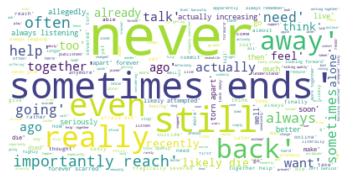

In [ ]:
text = " ".join(review for review in df.aspect_keywords.astype('string')).lower()
print (f"There are {len(text)} words in the combination of all review.")

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 30712 words in the combination of all review.


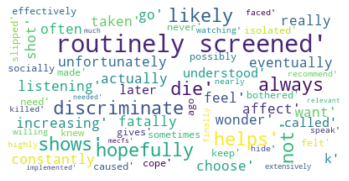

In [ ]:
text = " ".join(review for review in df.competition_aspects.astype('string')).lower()
print (f"There are {len(text)} words in the combination of all review.")

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# SENTIC ANALYSIS

In [ ]:
pip install sentic

In [ ]:
refined_data.drop(columns=['compound_nouns', 'aspect_keywords', 'competition',
       'competition_comp_nouns', 'competition_aspects'],inplace=True)
refined_data.columns

Index(['content', 'compound_vader_score'], dtype='object')

In [ ]:
df=refined_data.copy()

In [ ]:
text = " ".join(review for review in df.content.astype('string')).lower()

In [ ]:
from sentic import SenticPhrase
sp = SenticPhrase(text)

In [ ]:
#x=sp.get_semantics()
y=list(x)
# Creating a dataframe object from listoftuples
dfObj = pd.DataFrame(y) 
dfObj.to_csv('Semantic_words.csv')

In [ ]:
dfObj.head()

,0
0,abortionist
1,money_unit
2,blunderer
3,duchess
4,increase


There are 29198 words in the combination of all review.


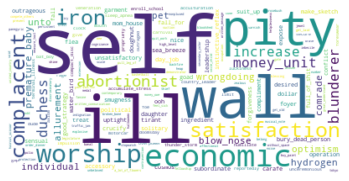

In [ ]:
text = " ".join(review for review in dfObj[0].astype('string')).lower()
print (f"There are {len(text)} words in the combination of all review.")

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()